# Seaborn

Seaborn sits on top of Matpülotlib and can make the Visuals more appealing. Additional it has some more capabilities in terms of plots

## Importing Libraries

In [18]:
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    print('Importing successful')

except ImportError:
    pass

Importing successful


In [19]:
df = pd.read_csv('cars_data.csv')

print('Import Dataframe from Repository')

Import Dataframe from Repository


## Check Data

In [20]:
df.head()

,manufacturer,model,year,engine_power,fuel_type,transmission,odometr,price,region,description,price_category
0,Chevrolet,Nexia 3,2022.0,1.5,Benzin,Avtomat,8500,12500.0,Tashkent,"2022 yil,\n \n ...",high
1,Chevrolet,Spark,2017.0,1.3,Gaz-benzin,Mexanika,300000,6500.0,Khorezm,"2017 yil,\n \n ...",low
2,Chevrolet,Gentra,2023.0,1.6,Benzin,Avtomat,23000,15800.0,Andijan,"2023 yil,\n \n ...",high
3,Mercedes-Benz,E 230,1985.0,1.8,Gaz-benzin,Mexanika,395000,5000.0,Namangan,"1985 yil,\n \n ...",low
4,Chevrolet,Lacetti,2010.0,1.8,Gaz-benzin,Avtomat,147000,7500.0,Tashkent,"2010 yil,\n \n ...",middle


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   manufacturer    3657 non-null   object 
 1   model           3647 non-null   object 
 2   year            3647 non-null   float64
 3   engine_power    3657 non-null   float64
 4   fuel_type       3647 non-null   object 
 5   transmission    3657 non-null   object 
 6   odometr         3657 non-null   int64  
 7   price           3657 non-null   float64
 8   region          3647 non-null   object 
 9   description     3657 non-null   object 
 10  price_category  3657 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 314.4+ KB


In [22]:
df.describe(include='all')

,manufacturer,model,year,engine_power,fuel_type,transmission,odometr,price,region,description,price_category
count,3657,3647,3647.000000,3657.000000,3647,3657,3.657000e+03,3657.000000,3647,3657,3657
unique,37,155,NaN,NaN,3,5,NaN,NaN,13,3406,3
top,Chevrolet,Gentra,NaN,NaN,Benzin,Mexanika,NaN,NaN,Tashkent,"2023 yil,\n \n ...",high
freq,3013,592,NaN,NaN,2461,2002,NaN,NaN,1822,5,1237
mean,NaN,NaN,2015.681656,1.553913,NaN,NaN,1.361803e+05,10159.757998,NaN,NaN,NaN
std,NaN,NaN,7.696581,0.623473,NaN,NaN,1.781281e+05,8037.630982,NaN,NaN,NaN
min,NaN,NaN,1958.000000,0.800000,NaN,NaN,0.000000e+00,434.000000,NaN,NaN,NaN
25%,NaN,NaN,2012.000000,1.300000,NaN,NaN,3.000000e+04,6000.000000,NaN,NaN,NaN
50%,NaN,NaN,2018.000000,1.500000,NaN,NaN,9.200000e+04,9000.000000,NaN,NaN,NaN
75%,NaN,NaN,2021.000000,1.600000,NaN,NaN,1.950000e+05,12600.000000,NaN,NaN,NaN


In [23]:
df.isnull().sum()

manufacturer       0
model             10
year              10
engine_power       0
fuel_type         10
transmission       0
odometr            0
price              0
region            10
description        0
price_category     0
dtype: int64

## Barchart

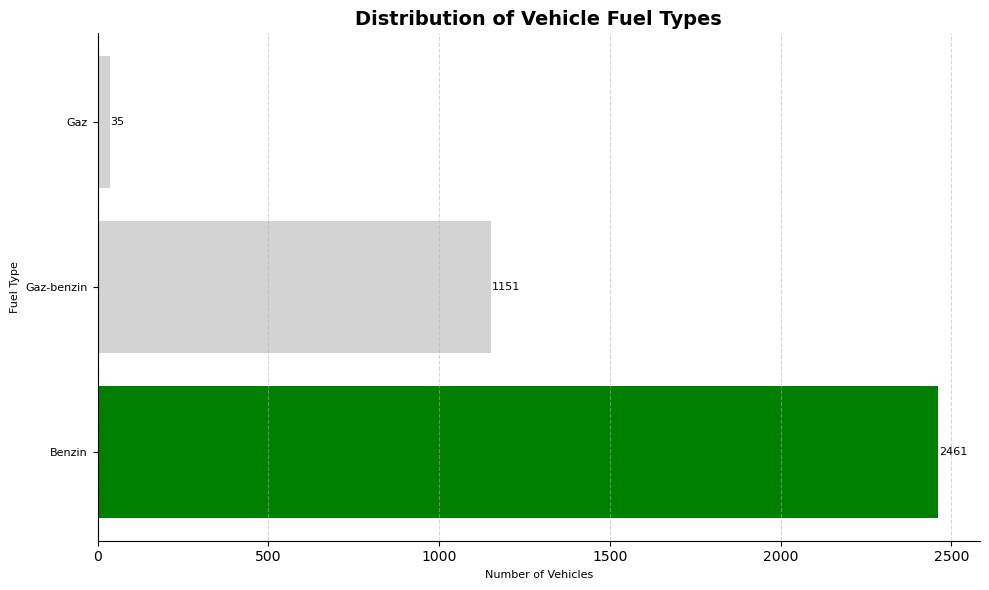

In [24]:
count_fueltype = df['fuel_type'].value_counts()

fig, ax = plt.subplots(figsize=(10, 6)) # Set a larger figure size for better readability

# Plot the bars horizontally
# Note: For horizontal bars, the 'width' parameter of ax.bar becomes 'height' in ax.barh
# And the 'x' values become 'y' values, and 'height' becomes 'width'.
bars = ax.barh(count_fueltype.index, count_fueltype.values, color=['green', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey']) # Updated custom colors

# Add titles and labels (swapped for horizontal orientation)
ax.set_title('Distribution of Vehicle Fuel Types', fontsize=14, fontweight='bold') # Title font size updated
ax.set_xlabel('Number of Vehicles', fontsize=8) # X-axis label font size updated
ax.set_ylabel('Fuel Type', fontsize=8) # Y-axis label font size updated

# Add the count values next to each bar
for bar in bars:
    xval = bar.get_width() # Get the width (value) of the horizontal bar
    ax.text(xval + 3, bar.get_y() + bar.get_height()/2, int(xval), va='center', ha='left', fontsize=8, color='black') # Text offset and font size updated

# Improve y-axis tick label readability (since it's now categories)
plt.yticks(rotation=0, ha='right', fontsize=8) # Y-axis tick label font size updated

# Add a grid for better readability, focusing on the x-axis
ax.grid(axis='x', linestyle='--', alpha=0.5) # Grid alpha updated

# Remove the top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Seaborn Displot

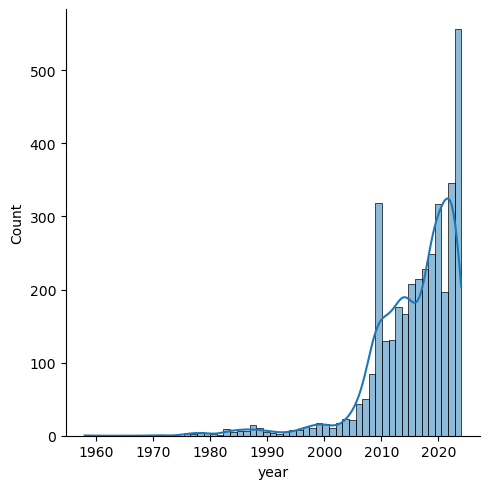

In [25]:
sns.displot(df['year'], kde=True)

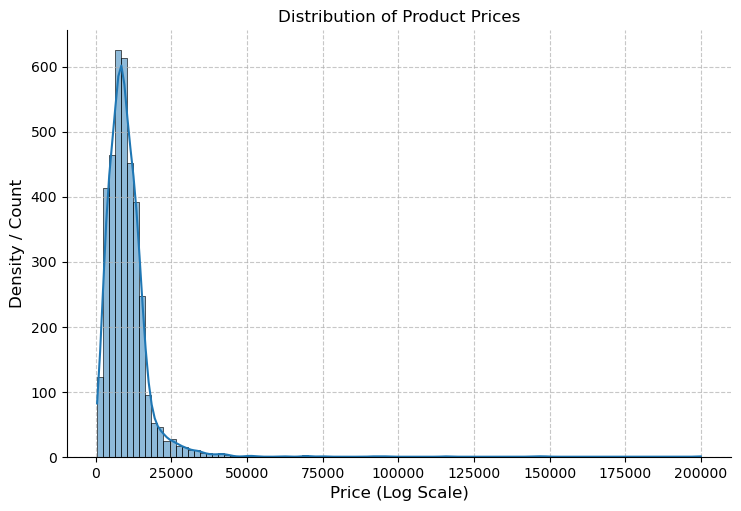

In [26]:
g = sns.displot(
    df['price'],
    kde=True,  # Show the Kernel Density Estimate
    bins=100,   # Increase the number of bins for more detail in the histogram
    aspect=1.5, # Adjust aspect ratio for a wider plot
    height=5,  # Set the height of the plot
)

# Set descriptive titles and labels for clarity
g.set_axis_labels("Price (Log Scale)", "Density / Count", fontsize=12)
g.set(title='Distribution of Product Prices')

# You can also add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

## Pairplot

In [27]:
df.describe()

,year,engine_power,odometr,price
count,3647.000000,3657.000000,3.657000e+03,3657.000000
mean,2015.681656,1.553913,1.361803e+05,10159.757998
std,7.696581,0.623473,1.781281e+05,8037.630982
min,1958.000000,0.800000,0.000000e+00,434.000000
25%,2012.000000,1.300000,3.000000e+04,6000.000000
50%,2018.000000,1.500000,9.200000e+04,9000.000000
75%,2021.000000,1.600000,1.950000e+05,12600.000000
max,2024.000000,8.000000,4.011000e+06,199900.000000


In [28]:
df2 = df[['year', 'fuel_type', 'odometr', 'price']]

In [29]:
df2.head()

,year,fuel_type,odometr,price
0,2022.0,Benzin,8500,12500.0
1,2017.0,Gaz-benzin,300000,6500.0
2,2023.0,Benzin,23000,15800.0
3,1985.0,Gaz-benzin,395000,5000.0
4,2010.0,Gaz-benzin,147000,7500.0


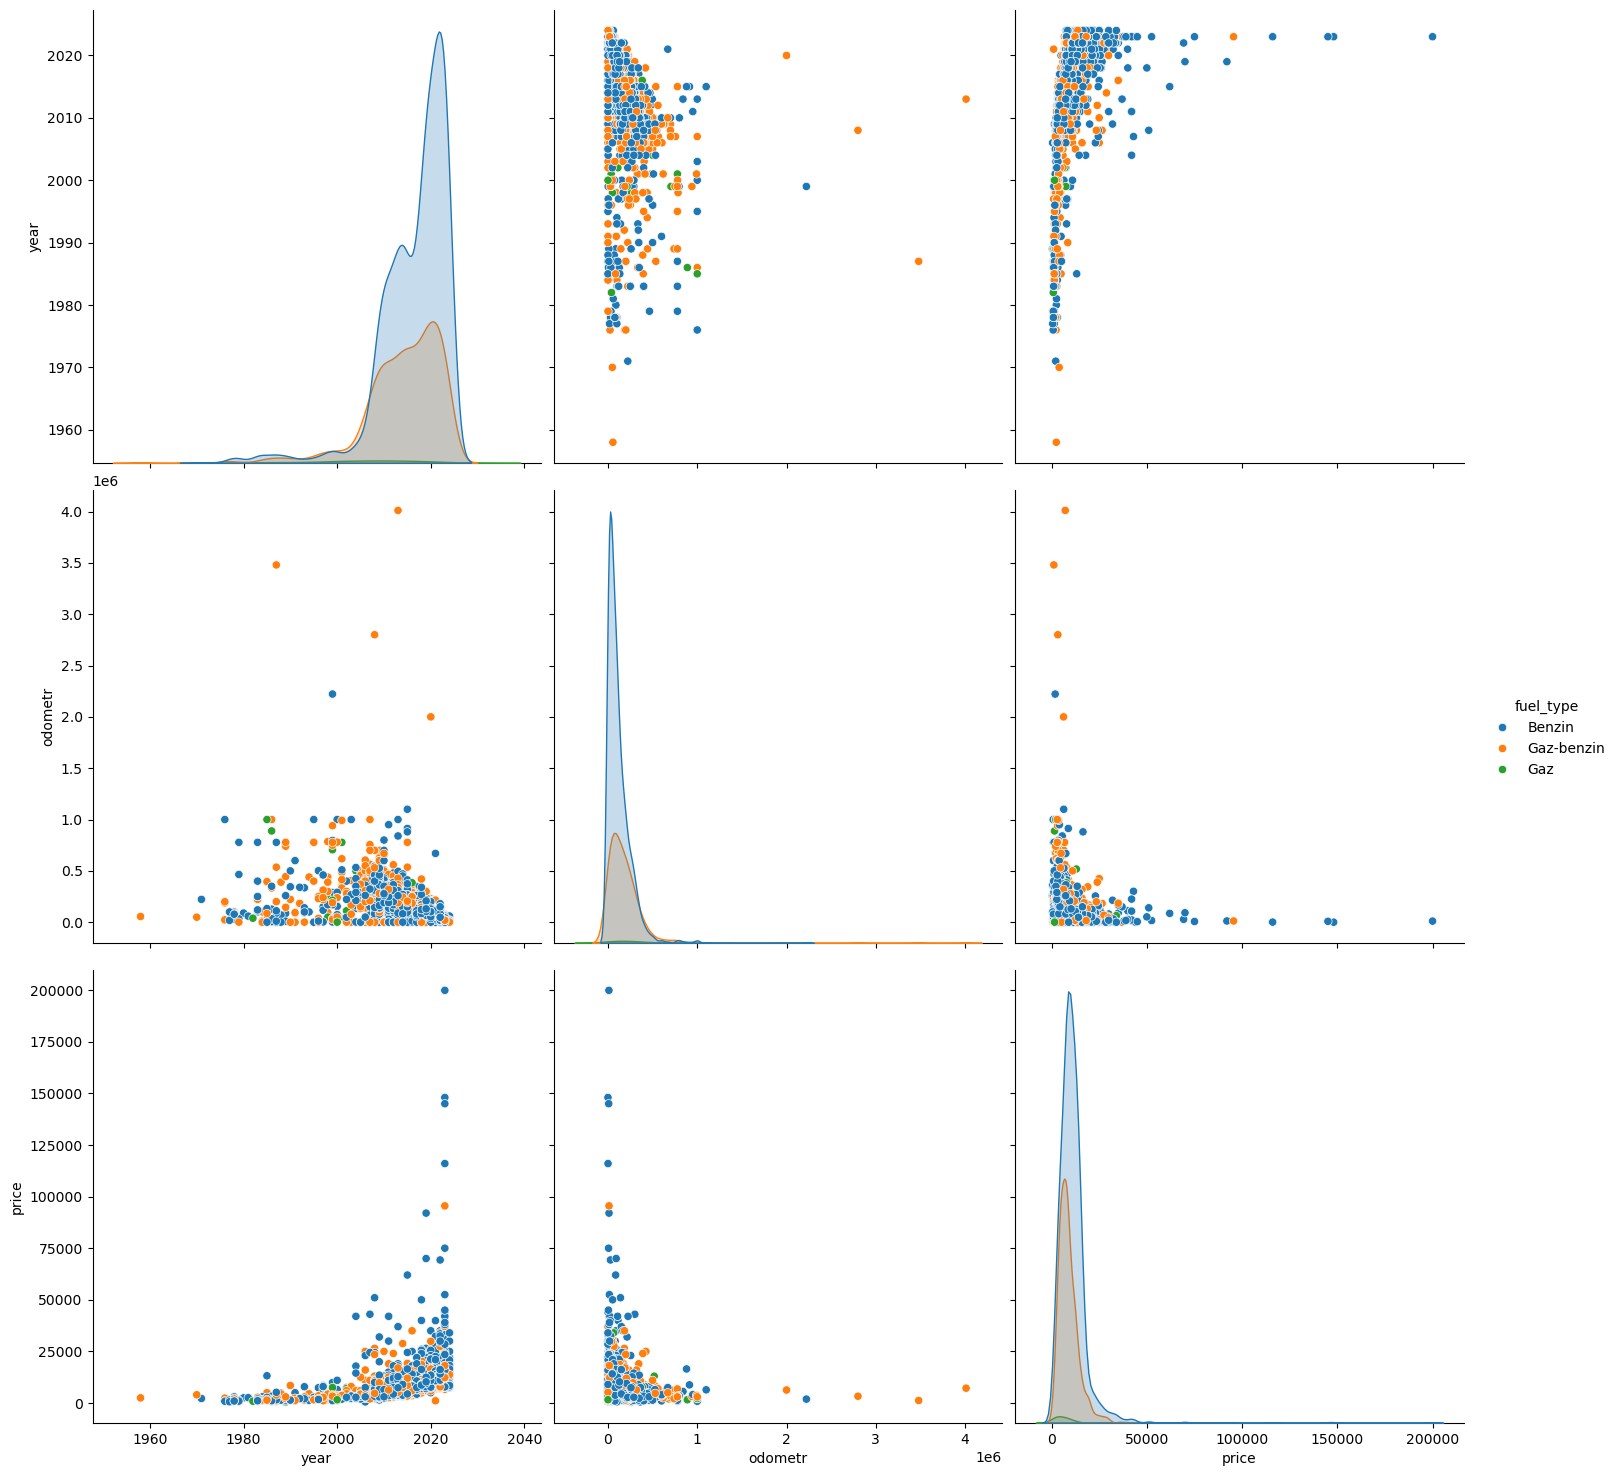

In [30]:
sns.pairplot(df2, hue='fuel_type', height=5);

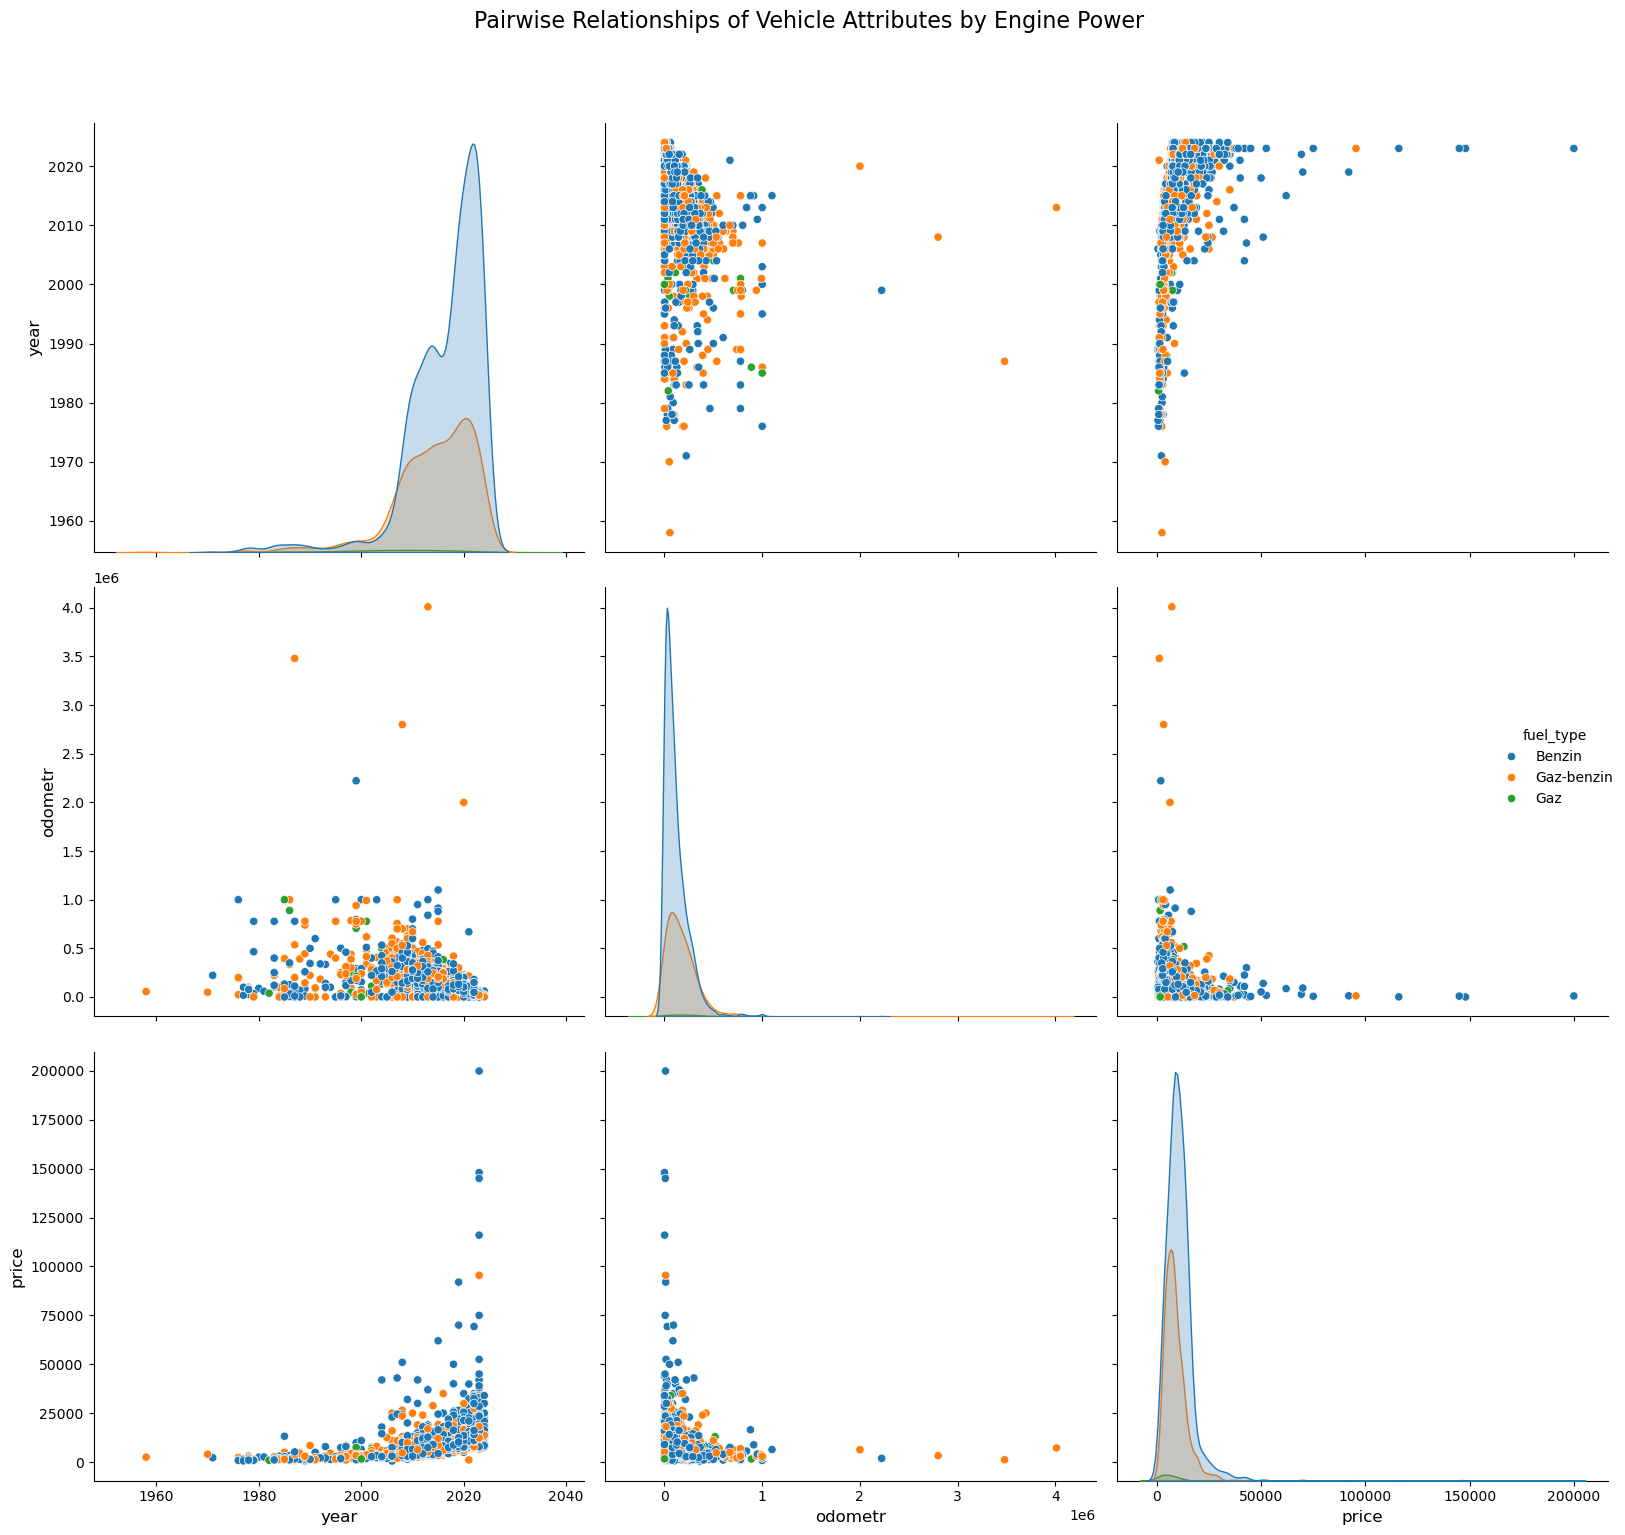

In [31]:
g = sns.pairplot(
    df2,
    hue='fuel_type',
    height=5
)

# Adjust font size on the axis
# Iterate through all axes (subplots) in the pairplot grid
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelsize=10) # Adjust x-axis tick label font size
    ax.tick_params(axis='y', labelsize=10) # Adjust y-axis tick label font size
    ax.xaxis.get_label().set_fontsize(12) # Adjust x-axis label font size
    ax.yaxis.get_label().set_fontsize(12) # Adjust y-axis label font size

# Add a Title on top of the plot
plt.suptitle('Pairwise Relationships of Vehicle Attributes by Engine Power', y=1.02, fontsize=16) # y adjusts title position

plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()

In [32]:
df2 = df[['year', 'price_category', 'odometr', 'price']]

In [33]:
df2.describe()

,year,odometr,price
count,3647.000000,3.657000e+03,3657.000000
mean,2015.681656,1.361803e+05,10159.757998
std,7.696581,1.781281e+05,8037.630982
min,1958.000000,0.000000e+00,434.000000
25%,2012.000000,3.000000e+04,6000.000000
50%,2018.000000,9.200000e+04,9000.000000
75%,2021.000000,1.950000e+05,12600.000000
max,2024.000000,4.011000e+06,199900.000000


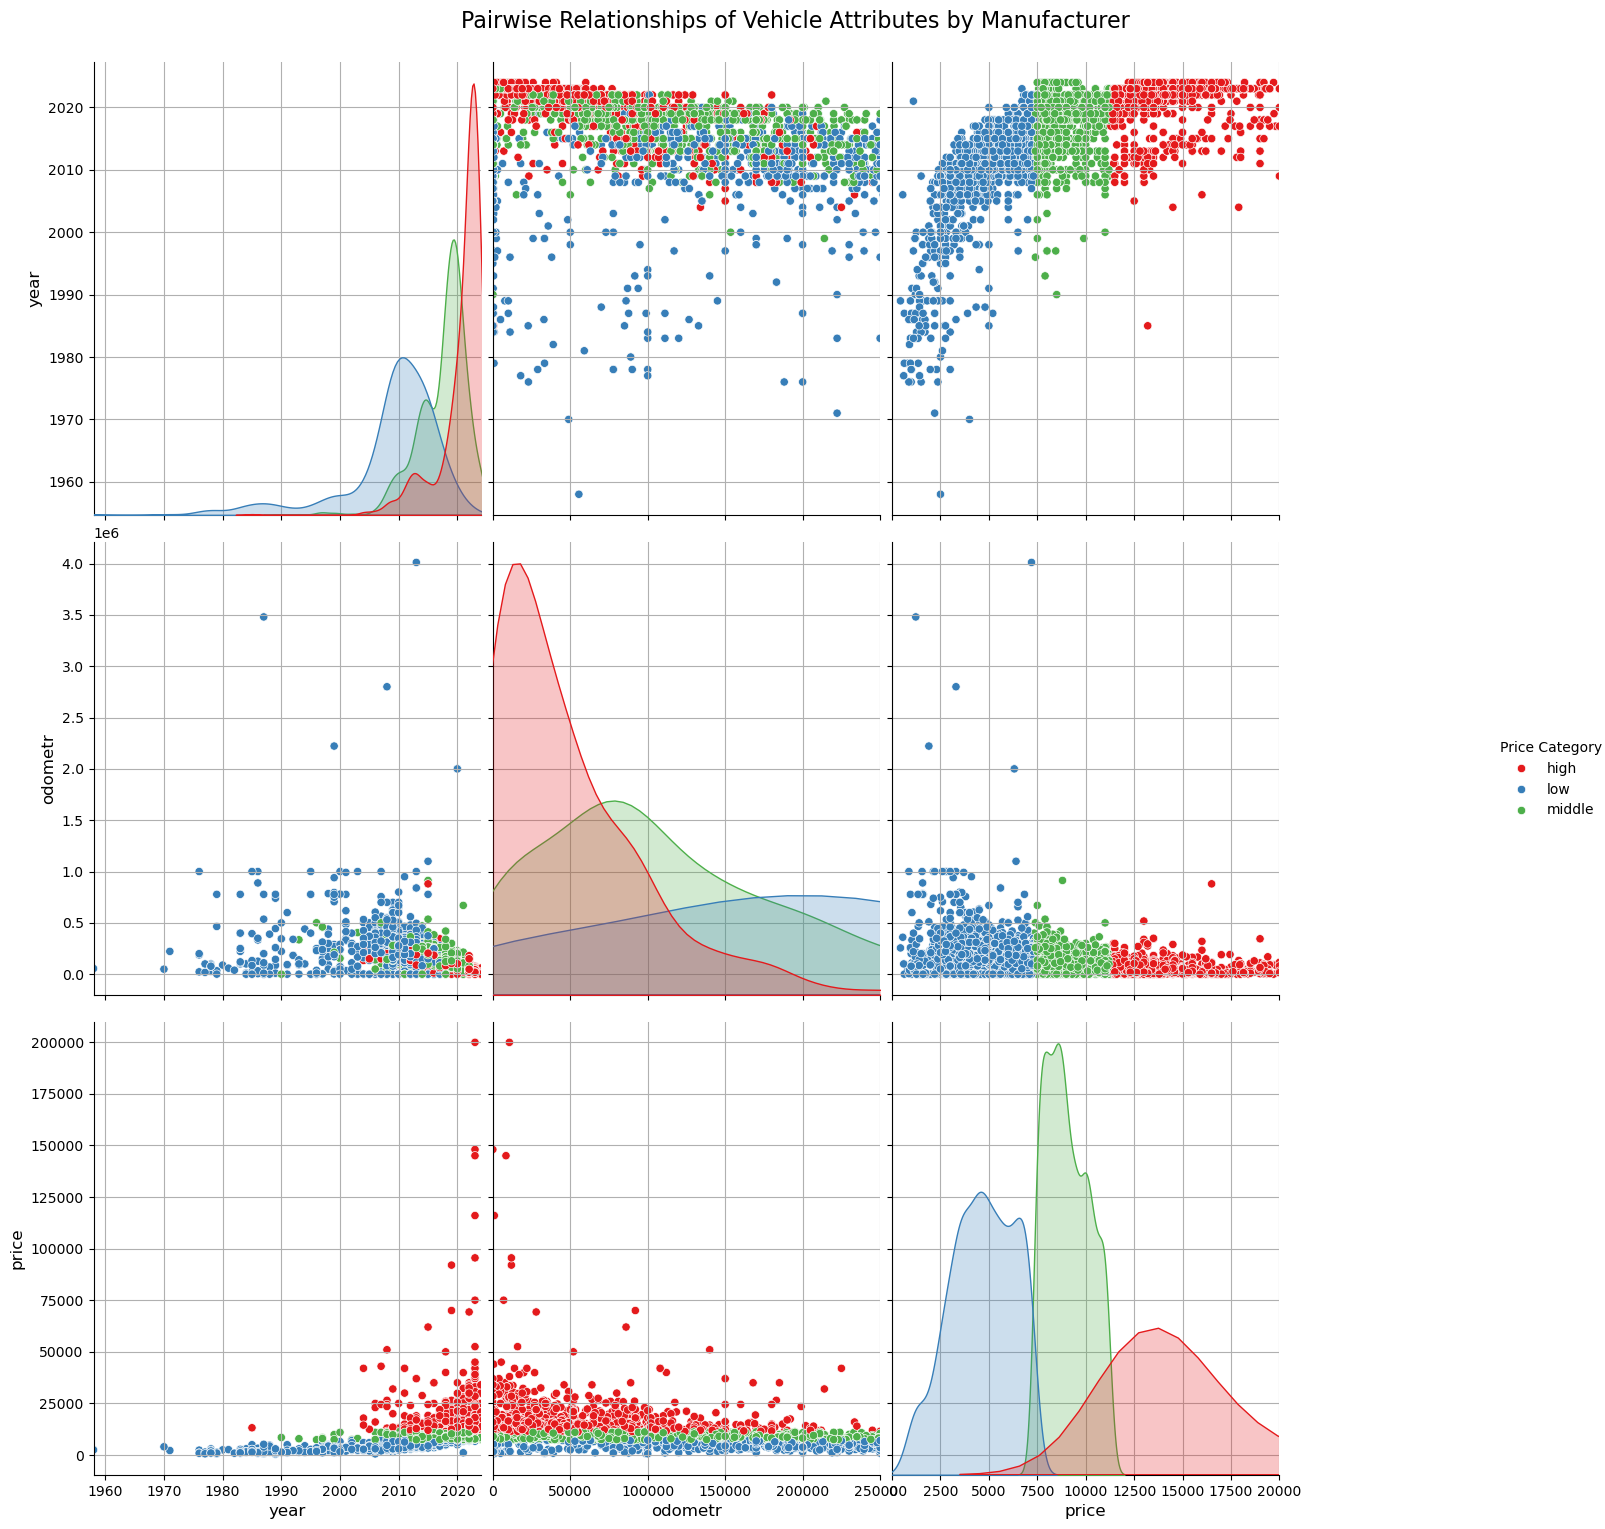

In [34]:
g = sns.pairplot(
    df2,
    hue='price_category', # Changed hue to 'manufacturer' as requested
    height=5, # Updated height as requested
    palette='Set1', # Using a qualitative palette for distinct colors
)

# Define x-axis limits based on your data description for better visibility
x_limits = {
    'year': (1958, 2024),
    'odometr': (0, 250000), # Adjusted to focus on the majority of data, cutting off extreme outliers
    'price': (0, 20000)    # Adjusted to focus on the majority of data, cutting off extreme outliers
    # Add other columns if they are present in df2 and need specific limits
   
}


# Adjust font size on the axis, add gridlines, and set x-axis limits
# Iterate through all axes (subplots) in the pairplot grid
for ax in g.axes.flat:
    # Adjust x-axis tick label and label font size
    ax.tick_params(axis='x', labelsize=10)
    ax.xaxis.get_label().set_fontsize(12)

    # Adjust y-axis tick label and label font size
    ax.tick_params(axis='y', labelsize=10)
    ax.yaxis.get_label().set_fontsize(12)

    # Add gridlines to each subplot
    ax.grid(True)

    # Set x-axis limits based on the column name
    col_name = ax.get_xlabel()
    if col_name in x_limits:
        ax.set_xlim(x_limits[col_name])

# Adjust the legend position to prevent it from being cut off
# Get the legend object
legend = g._legend
# Set its bounding box to place it outside the plot area on the right
legend.set_bbox_to_anchor((1, 0.5)) # Adjusted x-coordinate to 1.0 as per your latest code
legend.set_title("Price Category") # Set a clear title for the legend, reflecting the hue variable

# Add a Title on top of the plot
plt.suptitle('Pairwise Relationships of Vehicle Attributes by Manufacturer', y=1.02, fontsize=16) # Updated title to reflect manufacturer hue

# Adjust subplot parameters to make space for the external legend
plt.subplots_adjust(right=0.8) # Adjusted right margin to 0.8 as per your latest code

plt.show()


## Scatterplot

In [35]:
df.head()

,manufacturer,model,year,engine_power,fuel_type,transmission,odometr,price,region,description,price_category
0,Chevrolet,Nexia 3,2022.0,1.5,Benzin,Avtomat,8500,12500.0,Tashkent,"2022 yil,\n \n ...",high
1,Chevrolet,Spark,2017.0,1.3,Gaz-benzin,Mexanika,300000,6500.0,Khorezm,"2017 yil,\n \n ...",low
2,Chevrolet,Gentra,2023.0,1.6,Benzin,Avtomat,23000,15800.0,Andijan,"2023 yil,\n \n ...",high
3,Mercedes-Benz,E 230,1985.0,1.8,Gaz-benzin,Mexanika,395000,5000.0,Namangan,"1985 yil,\n \n ...",low
4,Chevrolet,Lacetti,2010.0,1.8,Gaz-benzin,Avtomat,147000,7500.0,Tashkent,"2010 yil,\n \n ...",middle


In [36]:
df.dtypes

manufacturer       object
model              object
year              float64
engine_power      float64
fuel_type          object
transmission       object
odometr             int64
price             float64
region             object
description        object
price_category     object
dtype: object

<Axes: xlabel='year', ylabel='price'>

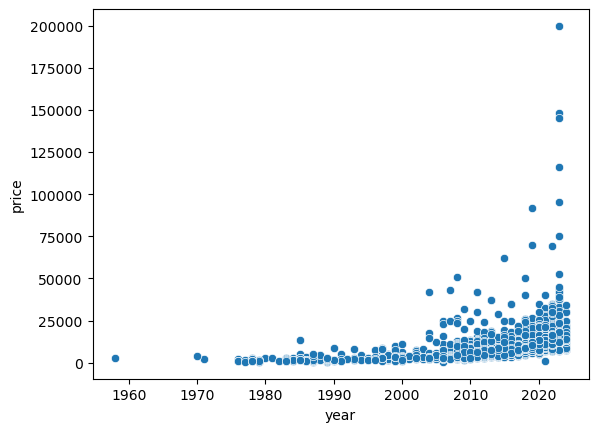

In [37]:
sns.scatterplot(x='year', y='price', data=df)

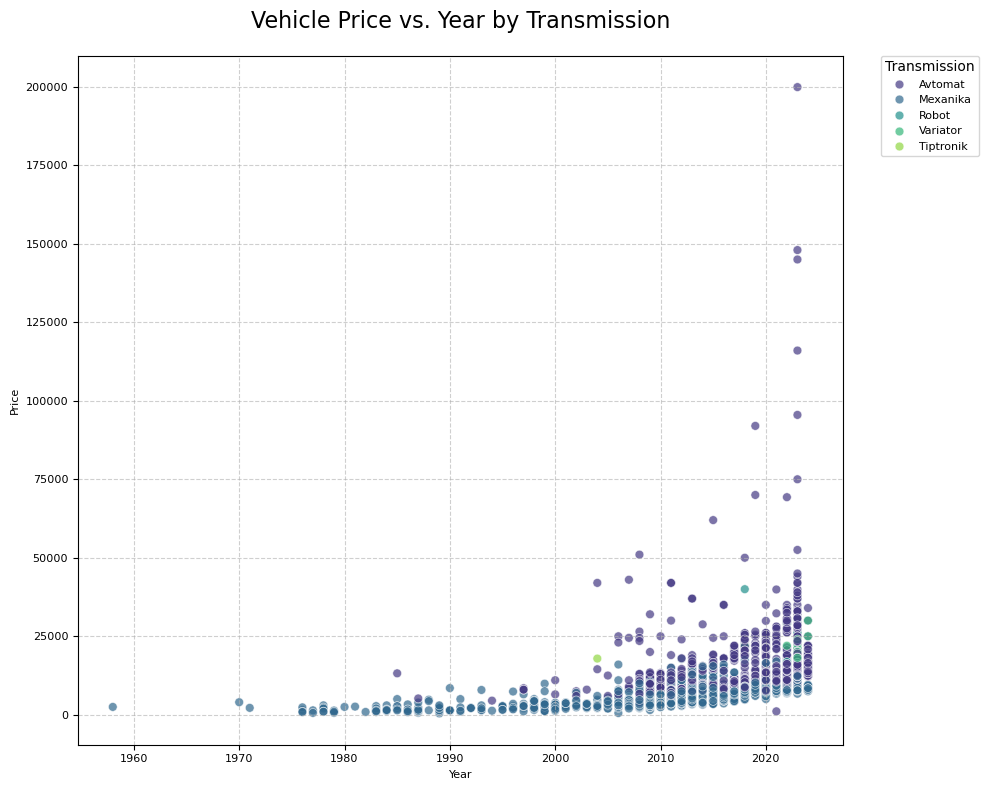

In [38]:
plt.figure(figsize=(10, 8)) # Set the figure size for better readability

# Create the scatterplot
# Using 'manufacturer' as hue to show how different manufacturers relate to year and price
sns.scatterplot(
    x='year',
    y='price',
    data=df,
    hue='transmission', # Color points by manufacturer
    palette='viridis',   # A perceptually uniform color palette for better distinction
    s=40,                # Adjust marker size for better visibility
    alpha=0.7,           # Add transparency to handle overplotting
    edgecolor='w',       # Add a white edge to markers for definition
    linewidth=0.5        # Line width for the marker edge
)

# Add a title to the plot
plt.title('Vehicle Price vs. Year by Transmission', fontsize=16, pad=20)

# Add labels to the axes
plt.xlabel('Year', fontsize=8)
plt.ylabel('Price', fontsize=8)

# Adjust tick label font sizes
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Move the legend outside the plot area to avoid overlapping data points
plt.legend(title='Transmission', bbox_to_anchor=(1.05, 1), fontsize=8,  loc='upper left', borderaxespad=0.)

# Adjust layout to make space for the legend
plt.tight_layout()

plt.show()

## Jointplot

In [39]:
df.head()

,manufacturer,model,year,engine_power,fuel_type,transmission,odometr,price,region,description,price_category
0,Chevrolet,Nexia 3,2022.0,1.5,Benzin,Avtomat,8500,12500.0,Tashkent,"2022 yil,\n \n ...",high
1,Chevrolet,Spark,2017.0,1.3,Gaz-benzin,Mexanika,300000,6500.0,Khorezm,"2017 yil,\n \n ...",low
2,Chevrolet,Gentra,2023.0,1.6,Benzin,Avtomat,23000,15800.0,Andijan,"2023 yil,\n \n ...",high
3,Mercedes-Benz,E 230,1985.0,1.8,Gaz-benzin,Mexanika,395000,5000.0,Namangan,"1985 yil,\n \n ...",low
4,Chevrolet,Lacetti,2010.0,1.8,Gaz-benzin,Avtomat,147000,7500.0,Tashkent,"2010 yil,\n \n ...",middle


In [40]:
df.dtypes

manufacturer       object
model              object
year              float64
engine_power      float64
fuel_type          object
transmission       object
odometr             int64
price             float64
region             object
description        object
price_category     object
dtype: object

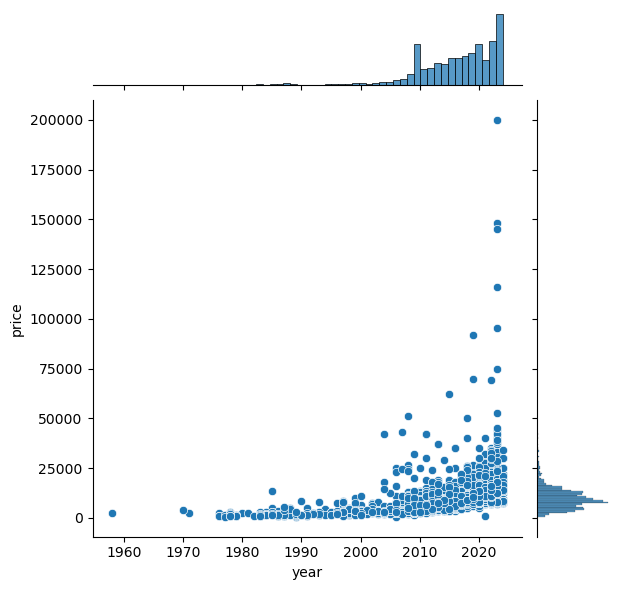

In [41]:
sns.jointplot(x='year', y='price', data=df)

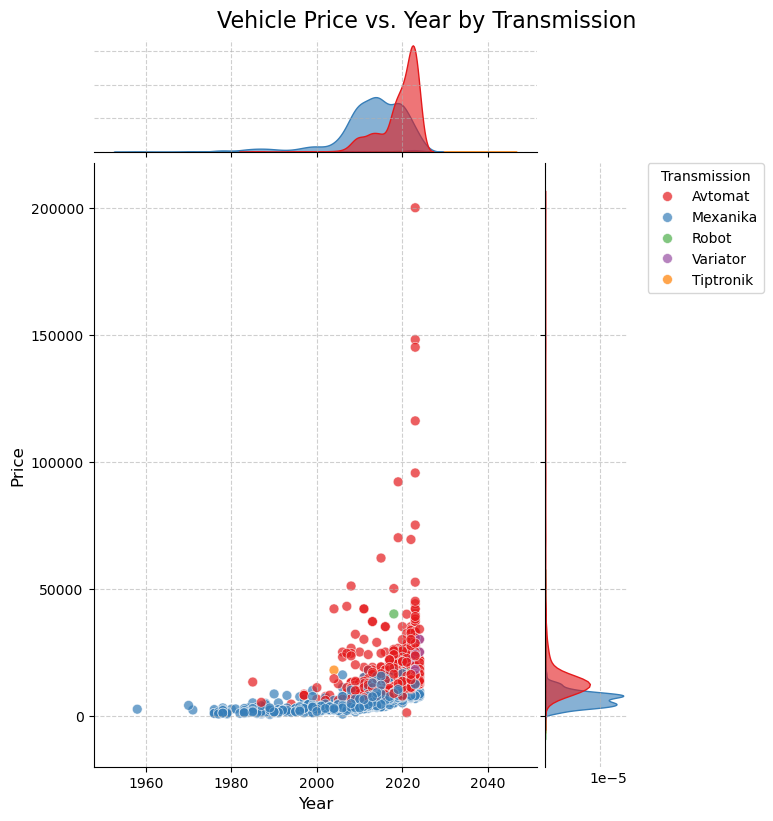

In [42]:
g = sns.jointplot(
    x='year',
    y='price',
    data=df,
    hue='transmission',
    palette='Set1',
    height=8,
    ratio=5,
    space=0.1,
    joint_kws={
        's': 50,
        'alpha': 0.7,
        'edgecolor': 'w',
        'linewidth': 0.5
    },
    marginal_kws={
        'alpha': 0.6,
    }
)

# Add a main title to the entire plot
g.fig.suptitle('Vehicle Price vs. Year by Transmission', fontsize=16, y=1.02)

# Add labels to the axes
g.set_axis_labels(xlabel='Year', ylabel='Price', fontsize=12)

# Adjust tick label font sizes for all axes
g.ax_joint.tick_params(axis='x', labelsize=10)
g.ax_joint.tick_params(axis='y', labelsize=10)
g.ax_marg_x.tick_params(axis='x', labelsize=10)
g.ax_marg_y.tick_params(axis='y', labelsize=10)

# Add gridlines to the joint plot and marginal plots
g.ax_joint.grid(True, linestyle='--', alpha=0.6)
g.ax_marg_x.grid(True, linestyle='--', alpha=0.6)
g.ax_marg_y.grid(True, linestyle='--', alpha=0.6)

# Move the legend outside the plot area
# We use bbox_to_anchor to place it relative to the figure, and then adjust the subplot layout.
legend = g.ax_joint.legend(title='Transmission', bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.)

# Adjust subplot parameters to make space for the external legend
# This explicitly creates space on the right side of the figure.
plt.subplots_adjust(right=0.75) # Increased right margin to accommodate the legend


plt.show()


## LmPlot

In [43]:
df.head()

,manufacturer,model,year,engine_power,fuel_type,transmission,odometr,price,region,description,price_category
0,Chevrolet,Nexia 3,2022.0,1.5,Benzin,Avtomat,8500,12500.0,Tashkent,"2022 yil,\n \n ...",high
1,Chevrolet,Spark,2017.0,1.3,Gaz-benzin,Mexanika,300000,6500.0,Khorezm,"2017 yil,\n \n ...",low
2,Chevrolet,Gentra,2023.0,1.6,Benzin,Avtomat,23000,15800.0,Andijan,"2023 yil,\n \n ...",high
3,Mercedes-Benz,E 230,1985.0,1.8,Gaz-benzin,Mexanika,395000,5000.0,Namangan,"1985 yil,\n \n ...",low
4,Chevrolet,Lacetti,2010.0,1.8,Gaz-benzin,Avtomat,147000,7500.0,Tashkent,"2010 yil,\n \n ...",middle


In [44]:
df.dtypes

manufacturer       object
model              object
year              float64
engine_power      float64
fuel_type          object
transmission       object
odometr             int64
price             float64
region             object
description        object
price_category     object
dtype: object

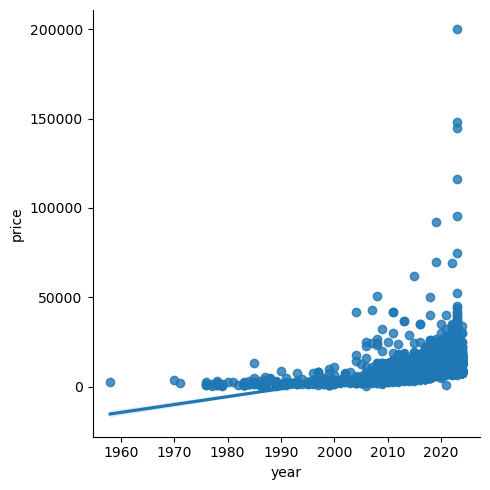

In [45]:
sns.lmplot(x='year', y='price', data=df)

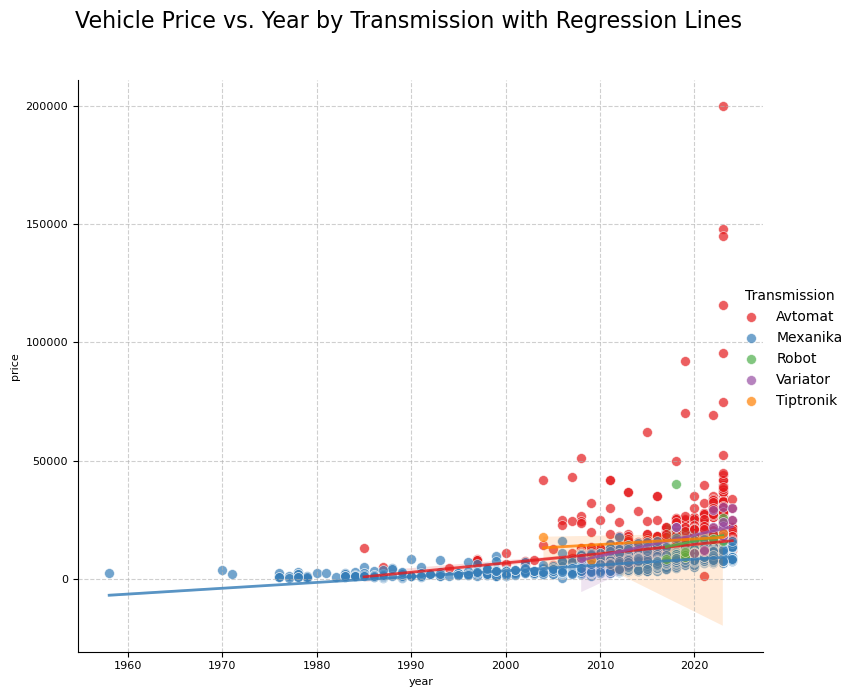

In [46]:
g = sns.lmplot(
    x='year',
    y='price',
    data=df,
    hue='transmission', # Use 'transmission' for coloring
    palette='Set1',     # Use the 'Set1' palette for distinct categorical colors
    height=7,           # Height of each facet
    aspect=1.1,         # Aspect ratio of each facet, making it wider
    scatter_kws={
        's': 50,        # Adjust marker size
        'alpha': 0.7,   # Add transparency to handle overplotting
        'edgecolor': 'w', # Add a white edge to markers for definition
        'linewidths': 0.5 # Changed 'linewidth' to 'linewidths' to resolve TypeError
    },
    line_kws={
        'linewidth': 2, # Line width for the regression line
        'alpha': 0.8    # Transparency for the regression line
    },
    ci=80               # Show 95% confidence interval for the regression estimate
)

# Add a main title to the entire plot
g.fig.suptitle('Vehicle Price vs. Year by Transmission with Regression Lines', fontsize=16, y=1)

# Adjust axis labels and tick font sizes
# lmplot returns a FacetGrid, so we iterate through its axes
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.xaxis.get_label().set_fontsize(8)
    ax.yaxis.get_label().set_fontsize(8)
    ax.grid(True, linestyle='--', alpha=0.6) # Add gridlines to each subplot

# Adjust the legend position
# lmplot automatically creates a legend when 'hue' is used.
# We can access and modify this existing legend.
if g.legend: # Check if a legend exists
    g.legend.set_title("Transmission")
    # You can further adjust its position if needed, for example:

    
# Adjust layout to make space for the title and the external legend
# Increased 'right' margin to provide more space for the legend.
plt.subplots_adjust(right=0.9, top=0.9) # Adjusted right margin for legend and top for suptitle

plt.show()



## Boxplots

In [47]:
df.head()

,manufacturer,model,year,engine_power,fuel_type,transmission,odometr,price,region,description,price_category
0,Chevrolet,Nexia 3,2022.0,1.5,Benzin,Avtomat,8500,12500.0,Tashkent,"2022 yil,\n \n ...",high
1,Chevrolet,Spark,2017.0,1.3,Gaz-benzin,Mexanika,300000,6500.0,Khorezm,"2017 yil,\n \n ...",low
2,Chevrolet,Gentra,2023.0,1.6,Benzin,Avtomat,23000,15800.0,Andijan,"2023 yil,\n \n ...",high
3,Mercedes-Benz,E 230,1985.0,1.8,Gaz-benzin,Mexanika,395000,5000.0,Namangan,"1985 yil,\n \n ...",low
4,Chevrolet,Lacetti,2010.0,1.8,Gaz-benzin,Avtomat,147000,7500.0,Tashkent,"2010 yil,\n \n ...",middle


In [48]:
df.dtypes

manufacturer       object
model              object
year              float64
engine_power      float64
fuel_type          object
transmission       object
odometr             int64
price             float64
region             object
description        object
price_category     object
dtype: object

<Axes: xlabel='region', ylabel='price'>

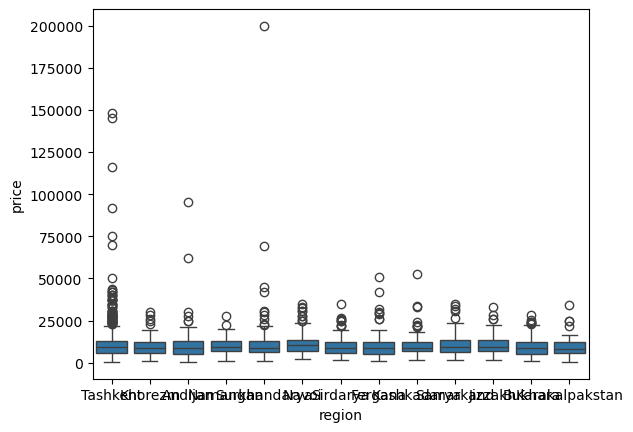

In [49]:
sns.boxplot(x='region', y='price', data=df)

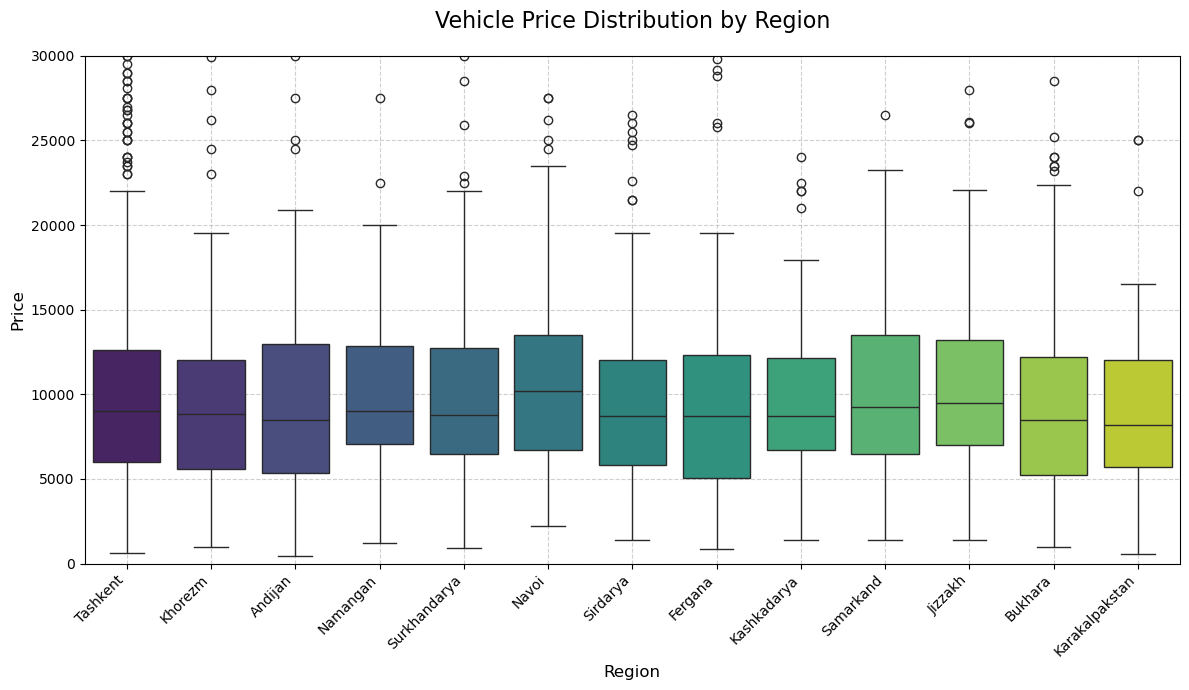

In [50]:
plt.figure(figsize=(12, 7)) # Set a larger figure size for better readability

# Create the boxplot
# To address the FutureWarning, explicitly assign the x variable ('manufacturer') to 'hue'
# and set legend=False, as recommended by Seaborn.
sns.boxplot(x='region', y='price', data=df, hue='region', palette='viridis', legend=False)

# Add a title to the plot
plt.title('Vehicle Price Distribution by Region', fontsize=16, pad=20)

# Adjust X-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate labels by 45 degrees and align right
plt.xlabel('Region', fontsize=12)

# Adjust Y-axis label and ticks
plt.ylabel('Price', fontsize=12)
plt.yticks(fontsize=10)
plt.ylim(0,30000)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

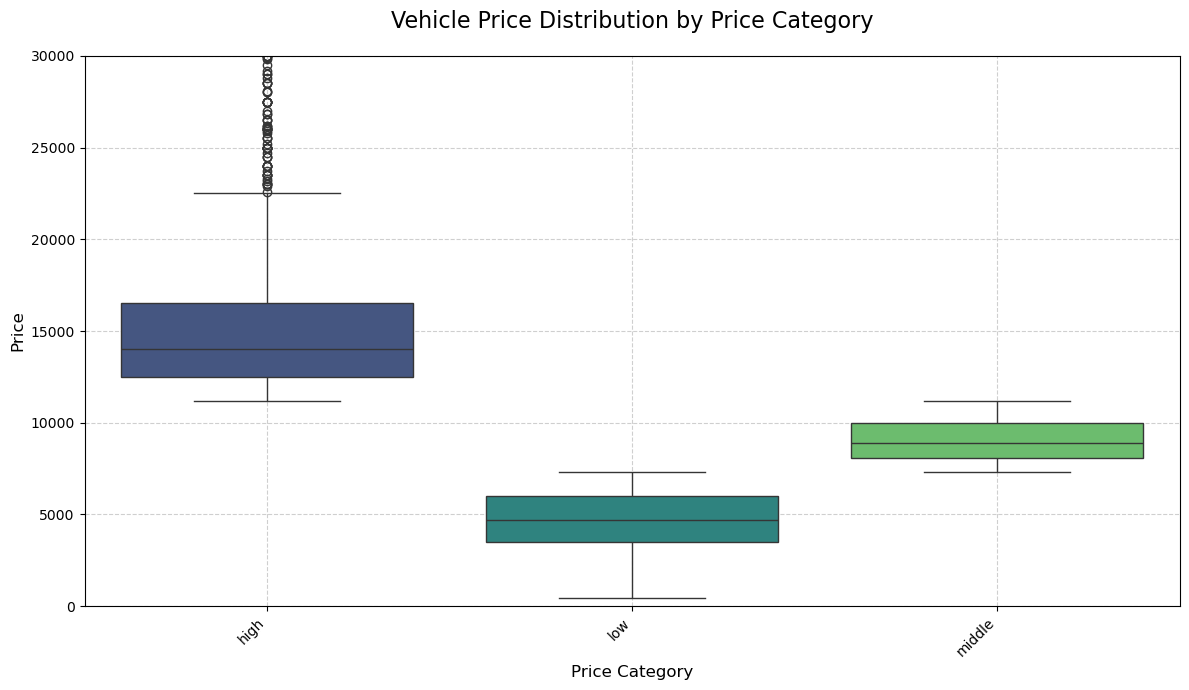

In [51]:
plt.figure(figsize=(12, 7)) # Set a larger figure size for better readability

# Create the boxplot
# To address the FutureWarning, explicitly assign the x variable ('manufacturer') to 'hue'
# and set legend=False, as recommended by Seaborn.
sns.boxplot(x='price_category', y='price', data=df, hue='price_category', palette='viridis', legend=False)

# Add a title to the plot
plt.title('Vehicle Price Distribution by Price Category', fontsize=16, pad=20)

# Adjust X-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate labels by 45 degrees and align right
plt.xlabel('Price Category', fontsize=12)

# Adjust Y-axis label and ticks
plt.ylim(0, 30000)
plt.ylabel('Price', fontsize=12)
plt.yticks(fontsize=10)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Swarmplot

In [52]:
df.head()

,manufacturer,model,year,engine_power,fuel_type,transmission,odometr,price,region,description,price_category
0,Chevrolet,Nexia 3,2022.0,1.5,Benzin,Avtomat,8500,12500.0,Tashkent,"2022 yil,\n \n ...",high
1,Chevrolet,Spark,2017.0,1.3,Gaz-benzin,Mexanika,300000,6500.0,Khorezm,"2017 yil,\n \n ...",low
2,Chevrolet,Gentra,2023.0,1.6,Benzin,Avtomat,23000,15800.0,Andijan,"2023 yil,\n \n ...",high
3,Mercedes-Benz,E 230,1985.0,1.8,Gaz-benzin,Mexanika,395000,5000.0,Namangan,"1985 yil,\n \n ...",low
4,Chevrolet,Lacetti,2010.0,1.8,Gaz-benzin,Avtomat,147000,7500.0,Tashkent,"2010 yil,\n \n ...",middle


In [53]:
df.dtypes

manufacturer       object
model              object
year              float64
engine_power      float64
fuel_type          object
transmission       object
odometr             int64
price             float64
region             object
description        object
price_category     object
dtype: object

<Axes: xlabel='price_category', ylabel='price'>

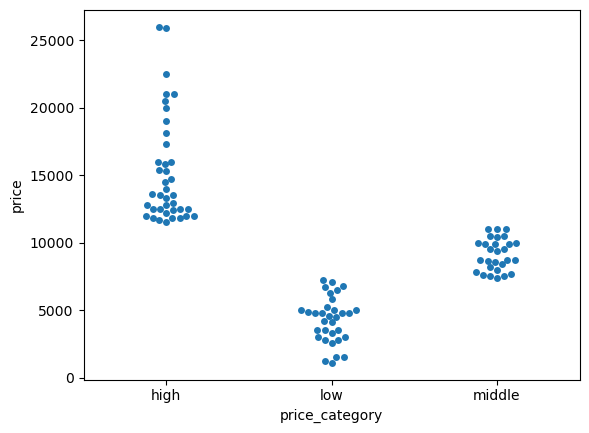

In [54]:
sns.swarmplot(x='price_category', y='price', data=df.head(100))

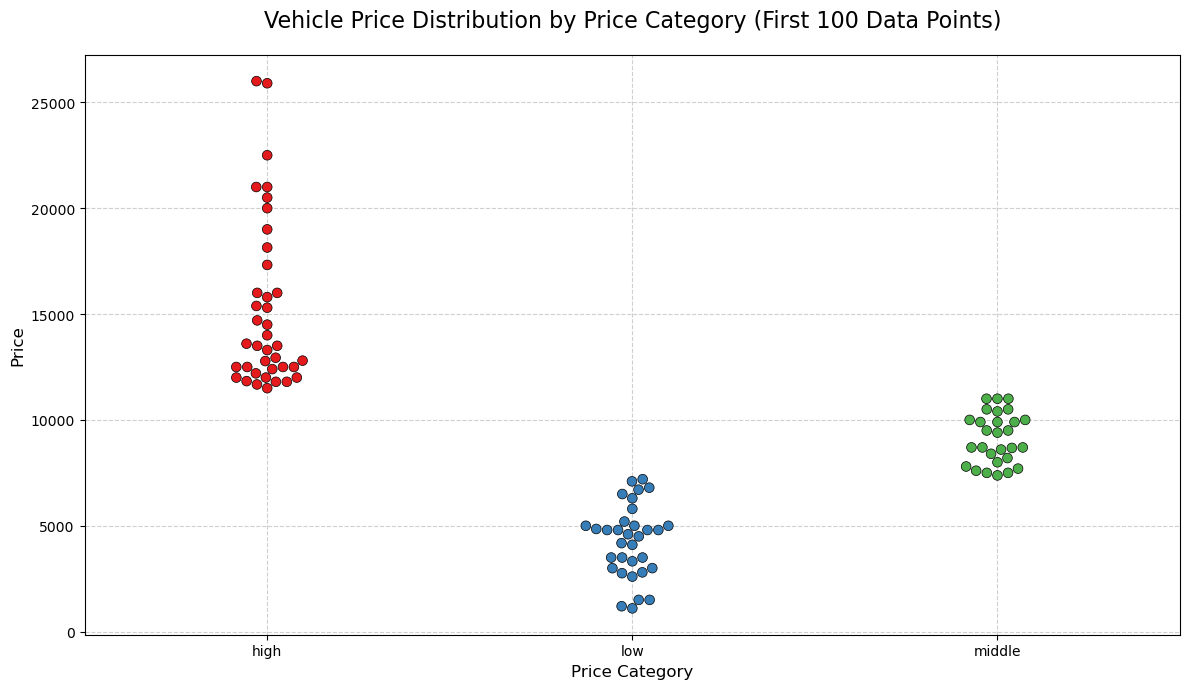

In [55]:
plt.figure(figsize=(12, 7)) # Set a larger figure size for better readability

# Create the swarmplot
# Assign x variable to hue for coloring each category distinctly
sns.swarmplot(
    x='price_category',
    y='price',
    data=df.head(100),
    hue='price_category',
    palette='Set1',
    legend=False,
    s=7, # Adjusted marker size for better visibility with fewer points
    edgecolor='black', # Added a subtle edge color for better point definition
    linewidth=0.5 # Line width for the edge
)

# Add a title to the plot
plt.title('Vehicle Price Distribution by Price Category (First 100 Data Points)', fontsize=16, pad=20)

# Adjust X-axis labels for better visibility
plt.xticks(ha='center', fontsize=10) 
plt.xlabel('Price Category', fontsize=12)

# Adjust Y-axis label and ticks
plt.ylabel('Price', fontsize=12)
plt.yticks(fontsize=10)

# Removed plt.ylim(0, 50000) as swarm plots often benefit from showing the full distribution
# for categorical data, and the context has changed.

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


## Countplot

<Axes: xlabel='price_category', ylabel='count'>

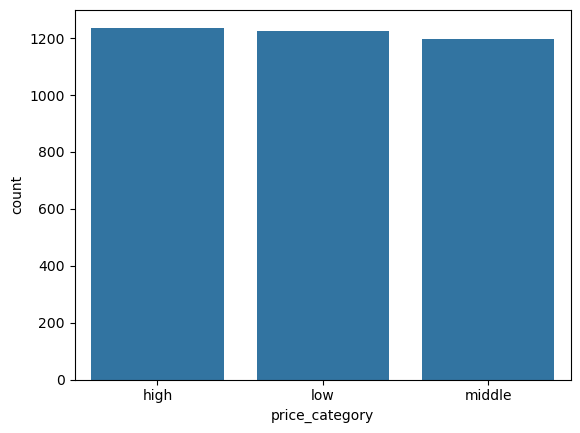

In [56]:
sns.countplot(x='price_category', data=df)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   manufacturer    3657 non-null   object 
 1   model           3647 non-null   object 
 2   year            3647 non-null   float64
 3   engine_power    3657 non-null   float64
 4   fuel_type       3647 non-null   object 
 5   transmission    3657 non-null   object 
 6   odometr         3657 non-null   int64  
 7   price           3657 non-null   float64
 8   region          3647 non-null   object 
 9   description     3657 non-null   object 
 10  price_category  3657 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 314.4+ KB


## Heatmap

In [58]:
df.head()

,manufacturer,model,year,engine_power,fuel_type,transmission,odometr,price,region,description,price_category
0,Chevrolet,Nexia 3,2022.0,1.5,Benzin,Avtomat,8500,12500.0,Tashkent,"2022 yil,\n \n ...",high
1,Chevrolet,Spark,2017.0,1.3,Gaz-benzin,Mexanika,300000,6500.0,Khorezm,"2017 yil,\n \n ...",low
2,Chevrolet,Gentra,2023.0,1.6,Benzin,Avtomat,23000,15800.0,Andijan,"2023 yil,\n \n ...",high
3,Mercedes-Benz,E 230,1985.0,1.8,Gaz-benzin,Mexanika,395000,5000.0,Namangan,"1985 yil,\n \n ...",low
4,Chevrolet,Lacetti,2010.0,1.8,Gaz-benzin,Avtomat,147000,7500.0,Tashkent,"2010 yil,\n \n ...",middle


In [59]:
df.describe()

,year,engine_power,odometr,price
count,3647.000000,3657.000000,3.657000e+03,3657.000000
mean,2015.681656,1.553913,1.361803e+05,10159.757998
std,7.696581,0.623473,1.781281e+05,8037.630982
min,1958.000000,0.800000,0.000000e+00,434.000000
25%,2012.000000,1.300000,3.000000e+04,6000.000000
50%,2018.000000,1.500000,9.200000e+04,9000.000000
75%,2021.000000,1.600000,1.950000e+05,12600.000000
max,2024.000000,8.000000,4.011000e+06,199900.000000


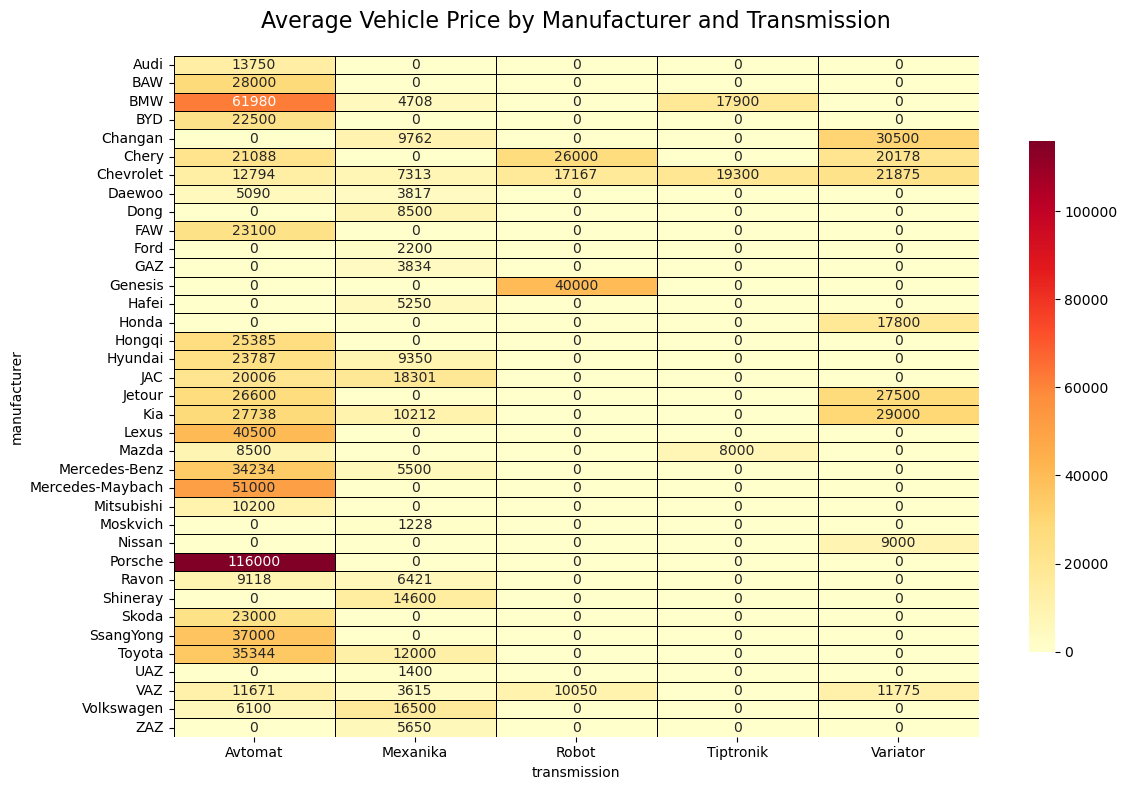

In [60]:
plt.figure(figsize=(12, 8)) # Set a good figure size for the heatmap

# Create a pivot table to calculate the mean price for each
# combination of manufacturer and transmission.
# .fillna(0) is used to replace NaN values (where a combination might not exist) with 0
# or you could choose to leave them as NaN if you want them to be uncolored.
avg_price_pivot = df.pivot_table(
    index='manufacturer',
    columns='transmission',
    values='price',
    aggfunc='mean'
).fillna(0) # Fill NaN with 0 for cleaner visualization, or leave as NaN

# Create the heatmap
sns.heatmap(
    avg_price_pivot,
    annot=True,      # Show the average price values on the heatmap
    fmt=".0f",       # Format annotations as whole numbers (prices)
    cmap='YlOrRd',   # A sequential colormap (e.g., Yellow-Green-Blue) for showing magnitude
    linewidths=.5,   # Add lines between cells for better separation
    cbar_kws={'shrink': 0.75}, # Adjust color bar size
    linecolor='black' # Add black lines for better contrast
)

# Add a title to the plot
plt.title('Average Vehicle Price by Manufacturer and Transmission', fontsize=16, pad=20)

# Adjust x-axis and y-axis tick label font sizes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0) # Ensure y-axis labels are horizontal

plt.tight_layout() # Adjust layout
plt.show()

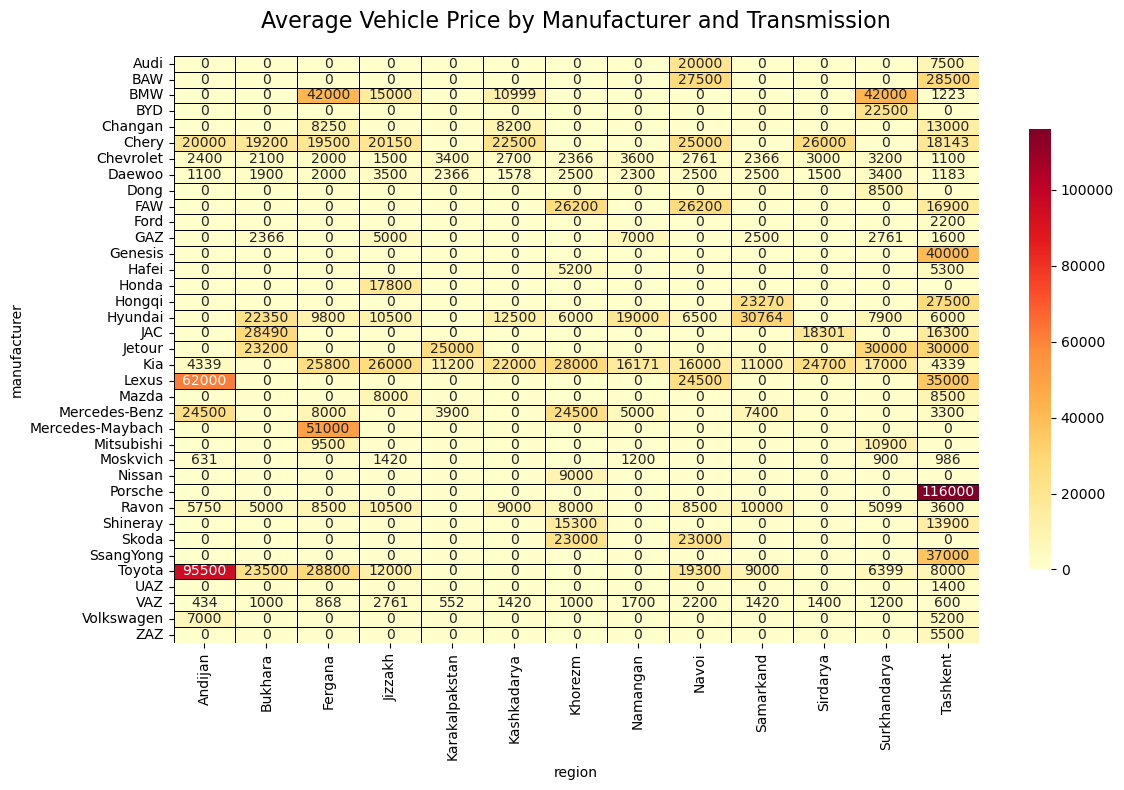

In [61]:
plt.figure(figsize=(12, 8)) # Set a good figure size for the heatmap

# Create a pivot table to calculate the mean price for each
# combination of manufacturer and transmission.
# .fillna(0) is used to replace NaN values (where a combination might not exist) with 0
# or you could choose to leave them as NaN if you want them to be uncolored.
avg_price_pivot = df.pivot_table(
    index='manufacturer',
    columns='region',
    values='price',
    aggfunc='min'
).fillna(0) # Fill NaN with 0 for cleaner visualization, or leave as NaN

# Create the heatmap
sns.heatmap(
    avg_price_pivot,
    annot=True,      # Show the average price values on the heatmap
    fmt=".0f",       # Format annotations as whole numbers (prices)
    cmap='YlOrRd',   # A sequential colormap (e.g., Yellow-Green-Blue) for showing magnitude
    linewidths=.5,   # Add lines between cells for better separation
    cbar_kws={'shrink': 0.75}, # Adjust color bar size
    linecolor='black' # Add black lines for better contrast
)

# Add a title to the plot
plt.title('Average Vehicle Price by Manufacturer and Transmission', fontsize=16, pad=20)

# Adjust x-axis and y-axis tick label font sizes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0) # Ensure y-axis labels are horizontal

plt.tight_layout() # Adjust layout
plt.show()

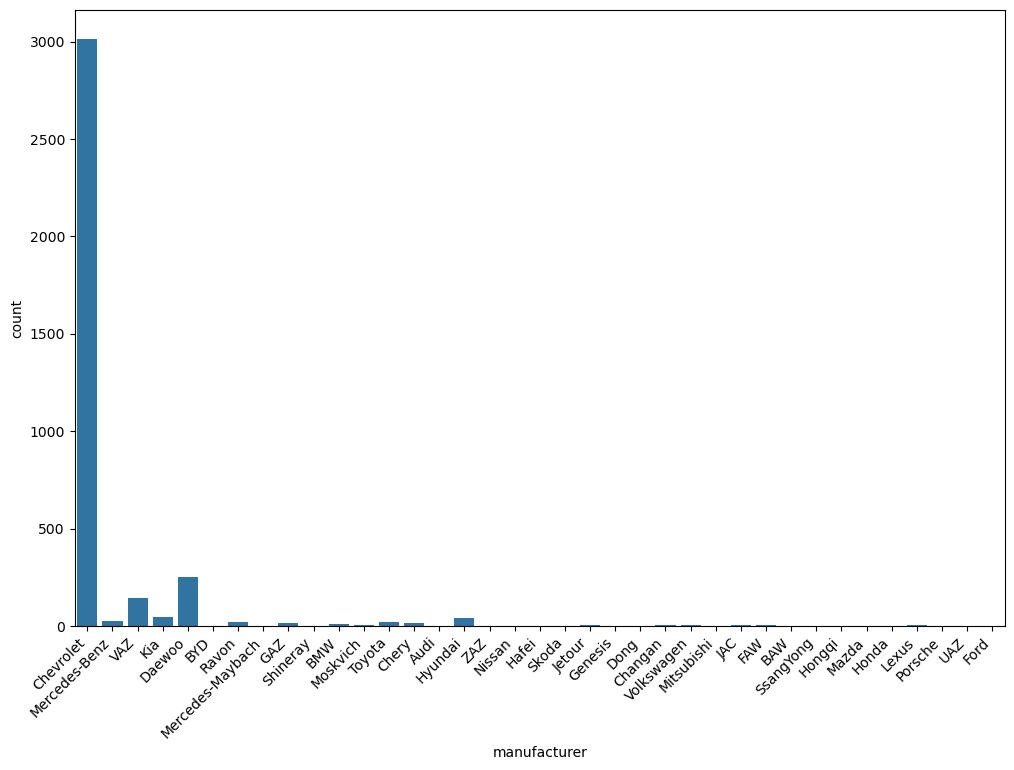

In [62]:
plt.figure(figsize=(12, 8))
sns.countplot(x='manufacturer', data=df)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()